## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


### **Reading both CSV Files From Drive and storing in dataframe**

In [ ]:
ps_file_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - EDA/Play Store Data.csv'
ur_file_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - EDA/User Reviews.csv'
ps_df = pd.read_csv(ps_file_path)
ur_df = pd.read_csv(ur_file_path)

# **Exploring Dataset**

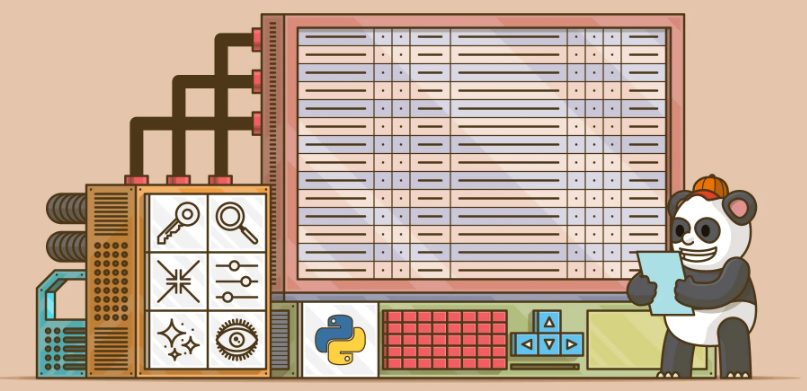

In [ ]:
# Shape of the play store dataframe.
ps_df.shape

(10841, 13)

In [ ]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Converting
* Reviews
* Size
* Installs
* Price

to numeric.

In [ ]:
#Checking how many values are not numeric in Reviews column in the Data Frame.
ps_df[~ps_df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**In index number 10472 values are incorrectly filled in the dataframe. Correcting the data as per the values present in the dataframe.**

In [ ]:
ps_df['Category'][10472] = 'No Category'
ps_df['Rating'][10472] = 1.9
ps_df['Reviews'][10472] = 19
ps_df['Size'][10472] = '3.0M'
ps_df['Installs'][10472] = '1000+'
ps_df['Type'][10472] = 'Free'
ps_df['Price'][10472] = '0'
ps_df['Content Rating'][10472] = 'Everyone'
ps_df['Genres'][10472] = 'No Genres'
ps_df['Last Updated'][10472] = 'February 11, 2018'
ps_df['Current Ver'][10472] = '1.0.19'
ps_df['Android Ver'][10472] = '4.0 and up'

print(ps_df.iloc[10472])

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                      No Category
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                            1000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                          No Genres
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
#Converting Reviews column to int type from object.
ps_df['Reviews'] = ps_df['Reviews'].astype(int)

In [ ]:
#Checking the unique values
ps_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#Converting all the data to Mb
for data in ps_df['Size']:
  if 'k' in str(data):
    new_data = float(data[:-1])/1000
    ps_df['Size'] = ps_df['Size'].replace(data,new_data)
  elif 'M' in str(data):
    new_data = float(data[:-1])
    ps_df['Size'] = ps_df['Size'].replace(data,new_data)

In [ ]:
#Converting Size column to numeric/float type
ps_df['Size'] = ps_df['Size'].replace("Varies with device",np.nan)
ps_df['Size'] = pd.to_numeric(ps_df['Size'])

In [ ]:
#Converting Price column to numeric/float type
ps_df['Price'] = pd.to_numeric(ps_df['Price'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
#Converting Installs column to numeric/float type.
ps_df['Installs'] = ps_df['Installs'].str.replace('+','')
ps_df['Installs'] = pd.to_numeric(ps_df['Installs'].str.replace(',',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
#Converting data in Last Updated column from string to Timestamp.
ps_df['Last Updated'] = pd.to_datetime(ps_df['Last Updated'])
ps_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [ ]:
#Checking the info of the Dataframe again to make sure the columns Datatype has been changed.
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [ ]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514505,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588343,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# **Cleaning The Data**

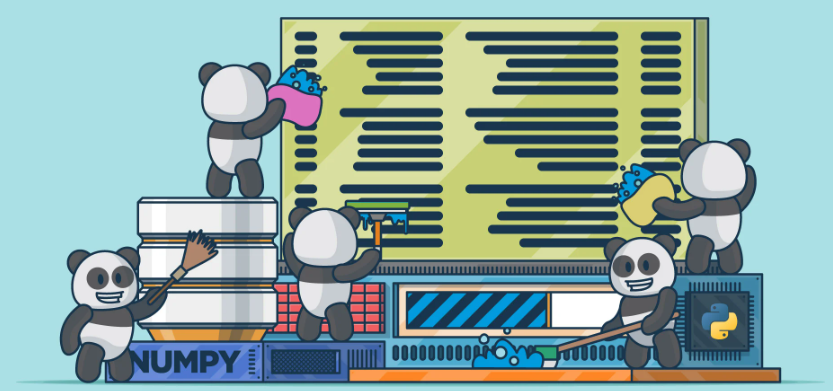

In [ ]:
# Checking the number of null values in each columns.
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
#Checking in which row of column 'Type' Null is coming.
ps_df[ps_df['Type'].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


**Since there is only one row in the dataset for which column 'Type' has NaN and the 'price' of the app is $0 so we can set the 'Type' to Free.**

In [ ]:
#Filling NaN with 'Free' in Type column for row 9148.
ps_df['Type'].fillna('Free',inplace = True)

**For 'Rating' and 'Size' column the best way to replace the NaN values is to replace them with the mean of the Rating and Size for each category.**
**For e.g. - If NaN is present in certain row under Size which belongs to the category FAMILY then this NaN will be replaced by the mean of the app Size which belongs to the FAMILY category.**
**So we are replacing the NaN values based on the mean grouped by 'Category'.**

In [ ]:
# Defining the function to replace the NaN value.
def filling_null_values_for_numerical_columns(col):
  ps_df[col].fillna(ps_df.groupby('Category')[col].transform('mean'), inplace = True)

In [ ]:
# Replacing the NaN values from 'Rating' and 'Size'.
for column in ['Rating', 'Size']:
  filling_null_values_for_numerical_columns(column)

In [ ]:
# Checking the number of null values in each columns after removing the null values from Type, Rating and Size.
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**Checking for duplicate values in the dataset.**

In [ ]:
ps_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

**From the above data we can infer that there are lots of duplicate values for the same app. To remove the duplicate values we will first sort the dataframe by 'Last Updated' date in descending order then we will remove the duplicates. In this way we will have the information for the latest entry in the database.**

In [ ]:
#Sorting the dataset in descending order of Last Updated date.
ps_df.sort_values(by = 'Last Updated', ascending = False, inplace = True)

In [ ]:
# Deleting the duplicate entries of App.
ps_df.drop_duplicates(subset = ['App'], inplace = True)

**Checking the number of null values in user_review dataframe.**

In [ ]:
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
#Removing all the NaN value rows from user_review dataframe.
ur_df.dropna(inplace = True)

In [ ]:
ur_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
# Info of the play_store dataframe after cleaning the data.
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 10712 to 7479
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   float64       
 5   Installs        9660 non-null   int64         
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
# Describing the data after cleaning.
ps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9660.000000,9.660000e+03,9660.000000,9.660000e+03,9660.000000
mean,4.174428,2.167093e+05,20.257427,7.796422e+06,1.097117
std,0.495755,1.830921e+06,20.634296,5.376705e+07,16.850750
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.200000,9.680000e+02,13.310822,1.000000e+05,0.000000
75%,4.500000,2.943825e+04,27.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [ ]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


# **Visualizing Data**

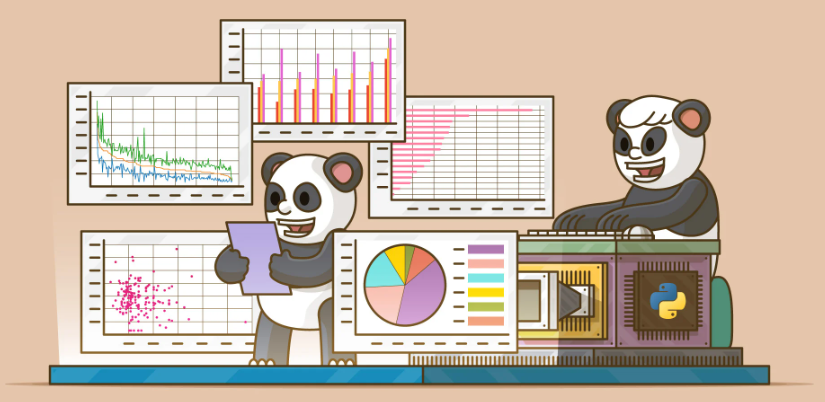

## **Graph 1 - Category wise number of apps.**

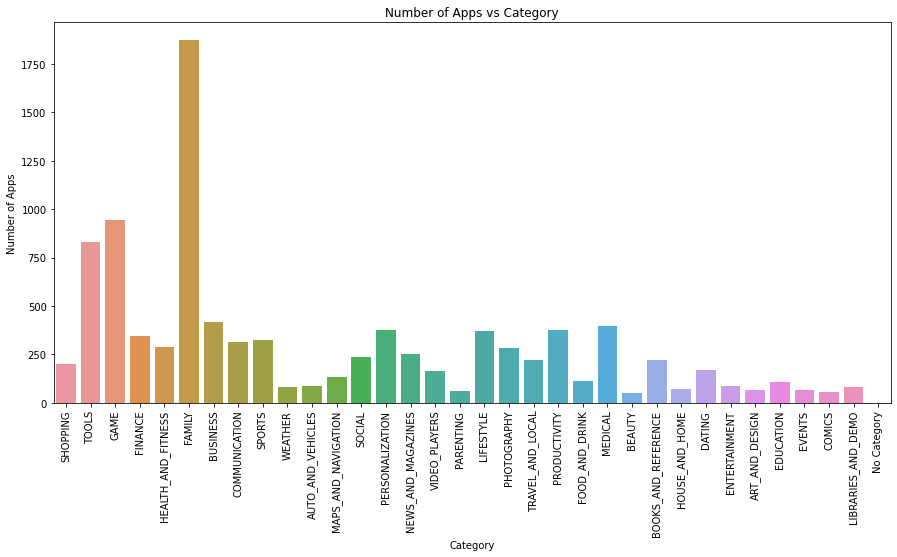

In [ ]:
#Plotting Number of Apps vs Category.
plt.figure(figsize=(15,7))
plt.title("Number of Apps vs Category")
sns.countplot(x = 'Category', data = ps_df)
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation = 90)
plt.show()

**The above graph shows that the category 'FAMILY' has the most number of apps.**

In [ ]:
# Checking the top 5 categories which have most number of apps.
cat_count_df = ps_df.groupby(['Category'])['Category'].count().reset_index(name = 'count')
cat_count_df.sort_values(by ='count', ascending = False, inplace = True)
cat_count_df.head()

,Category,count
11,FAMILY,1871
14,GAME,945
30,TOOLS,829
4,BUSINESS,419
20,MEDICAL,395


**So, from the above data we can infer that the Top 5 category in the play store which have most number of apps are - FAMILY, GAME, TOOLS, BUSINESS & MEDICAL.**

## **Graph 2 - Category wise number of installs.**

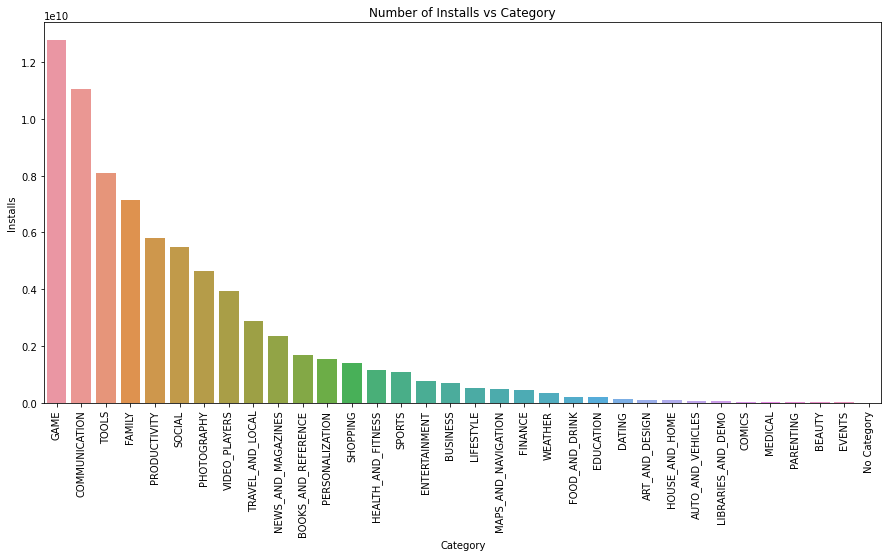

In [ ]:
#Plotting Number of Installs vs Category.
cat_install_df = ps_df.groupby(['Category'])[['Installs']].sum().reset_index()
cat_install_df.sort_values(by = 'Installs', ascending = False, inplace = True)
plt.figure(figsize=(15,7))
plt.title("Number of Installs vs Category")
sns.barplot(x = 'Category', y = 'Installs', data = cat_install_df)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.xticks(rotation = 90)
plt.show()

**From the above graph we can infer that the top 5 categories with most number of installs are - GAME, COMMUNICATION, TOOLS, FAMILY and PRODUCTIVITY.**

In [ ]:
#Top 5 categories with most number of installs -
cat_install_df.head()

,Category,Installs
14,GAME,12762924415
6,COMMUNICATION,11039276251
30,TOOLS,8102771915
11,FAMILY,7148442505
26,PRODUCTIVITY,5788091369


## **Graph 3 - Violin Graph to show Distribution of Rating**

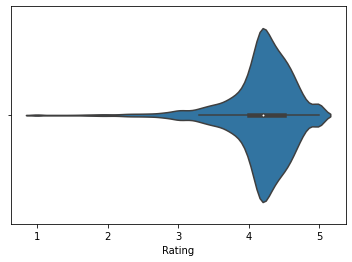

In [ ]:
#Plotting Violin Graph.
sns.violinplot(x = ps_df['Rating'], data = ps_df)
plt.show()

**From the above Violin graph we can infer that most of the apps are rated between 4 to 5.**

## **Graph 4 - Box plot to show Rating vs Category**

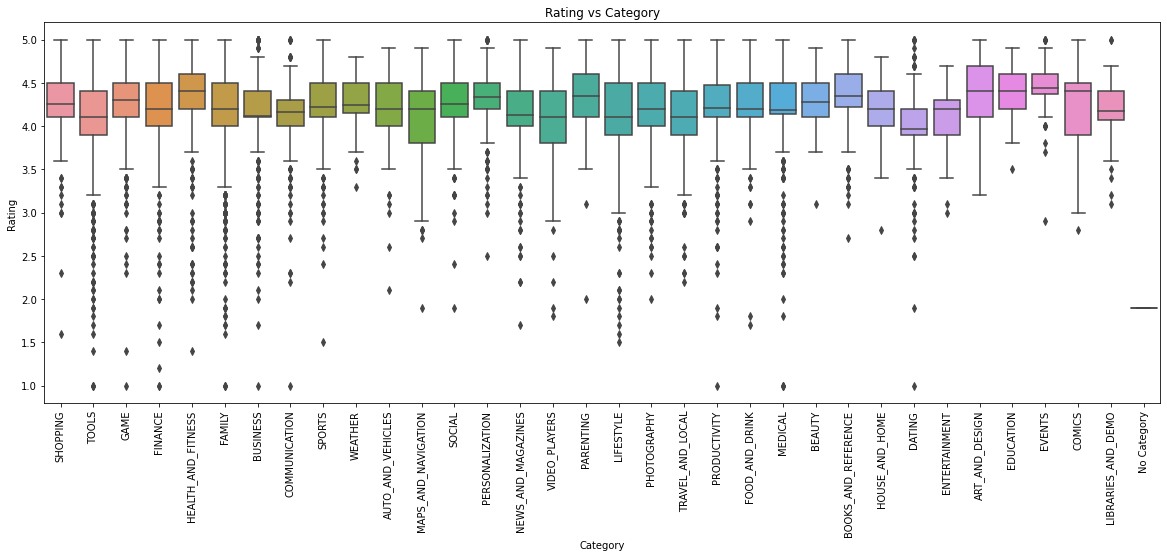

In [ ]:
#Plotting box plot for Rating vs Category.
plt.figure(figsize=(20,7))
sns.boxplot(x = ps_df['Category'], y = ps_df['Rating'], data = ps_df, orient = 'v')
plt.title("Rating vs Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Checking the top 5 categories with highest rating.
cat_rat_df = ps_df.groupby(['Category'])['Rating'].median().reset_index(name = 'median')
cat_rat_df.sort_values(by ='median', ascending = False, inplace = True)
cat_rat_df.head()

,Category,median
10,EVENTS,4.435556
0,ART_AND_DESIGN,4.400000
5,COMICS,4.400000
8,EDUCATION,4.400000
15,HEALTH_AND_FITNESS,4.400000


**The Top 5 Category with highest ratings are - EVENTS, ART_AND_DESIGN, COMICS, EDUCATION, HEALTH_AND_FITNESS.**

In [ ]:
#Checking 5 categories with worst rating.
cat_rat_df.tail()

,Category,median
18,LIFESTYLE,4.100000
30,TOOLS,4.100000
32,VIDEO_PLAYERS,4.100000
7,DATING,3.970769
22,No Category,1.900000


**5 Categories with worst ratings are - LIFESTYLE, TOOLS, VIDEO_PLAYERS, DATING, No Category.**

## **Graph 5 - Number of Apps vs Genres**

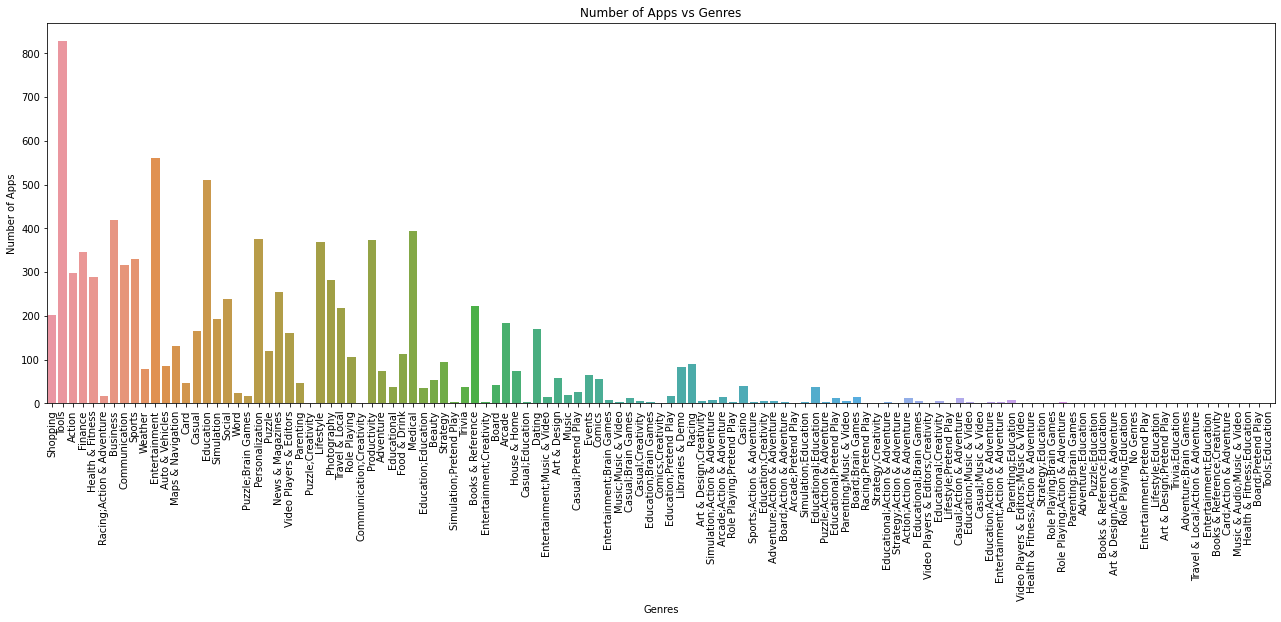

In [ ]:
#Plotting Number of apps vs Genres.
plt.figure(figsize=(22,7))
plt.title("Number of Apps vs Genres")
sns.countplot(x = 'Genres', data = ps_df)
plt.xlabel("Genres")
plt.ylabel("Number of Apps")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Checking the top 5 Genres which have most number of apps.
gen_count_df = ps_df.groupby(['Genres'])['Genres'].count().reset_index(name = 'count')
gen_count_df.sort_values(by ='count', ascending = False, inplace = True)
gen_count_df.head()

,Genres,count
108,Tools,828
51,Entertainment,561
38,Education,510
22,Business,419
70,Medical,395


**Top 5 Genres which are having most number of apps in play store are - Tools, Entertainment, Education, Business & Medical.**

## **Graph 6 - Number of Installs vs Genres**

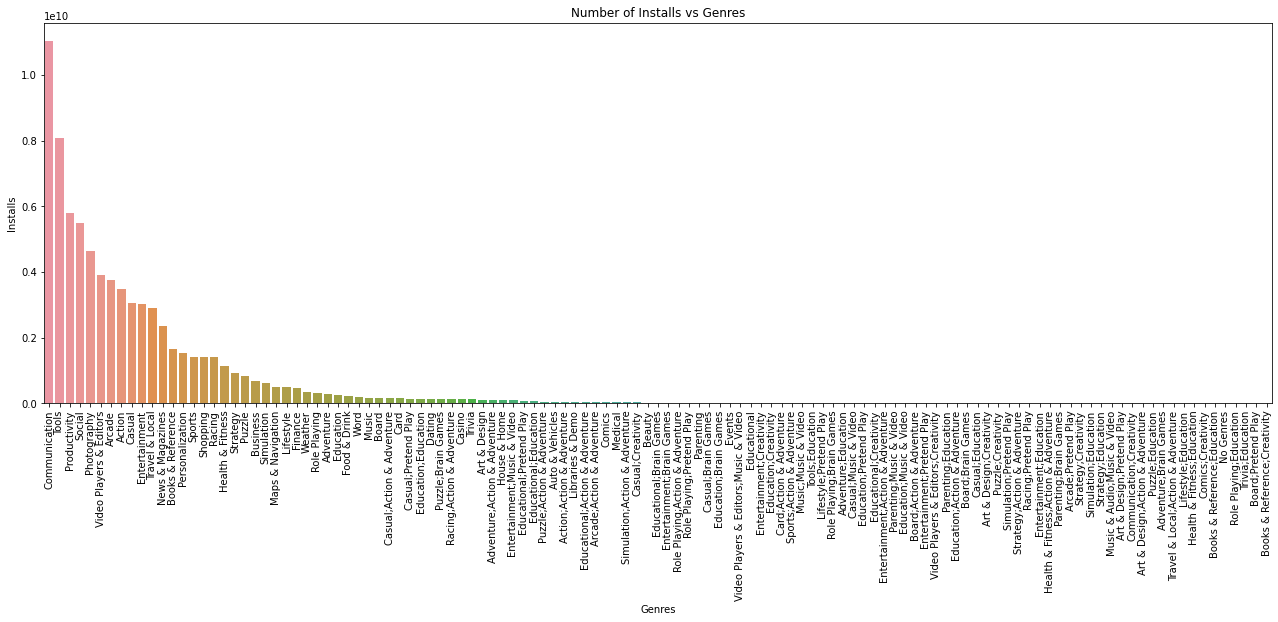

In [ ]:
#Plotting Number of Installs vs Genres.
gen_install_df = ps_df.groupby(['Genres'])[['Installs']].sum().reset_index()
gen_install_df.sort_values(by = 'Installs', ascending = False, inplace = True)
plt.figure(figsize=(22,7))
plt.title("Number of Installs vs Genres")
sns.barplot(x = 'Genres', y = 'Installs', data = gen_install_df)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.xticks(rotation = 90)
plt.show()

**From the above graph we can infer that the top 5 Genres with most number of installs are - Communication, Tools, Productivity, Social & Photography.**

In [ ]:
#Top 5 Genres with most number of installs -
gen_install_df.head()

,Genres,Installs
35,Communication,11039276251
108,Tools,8092771915
82,Productivity,5788091369
101,Social,5487867902
81,Photography,4658147655


## **Graph 7 - Box plot to show Rating vs Genres**

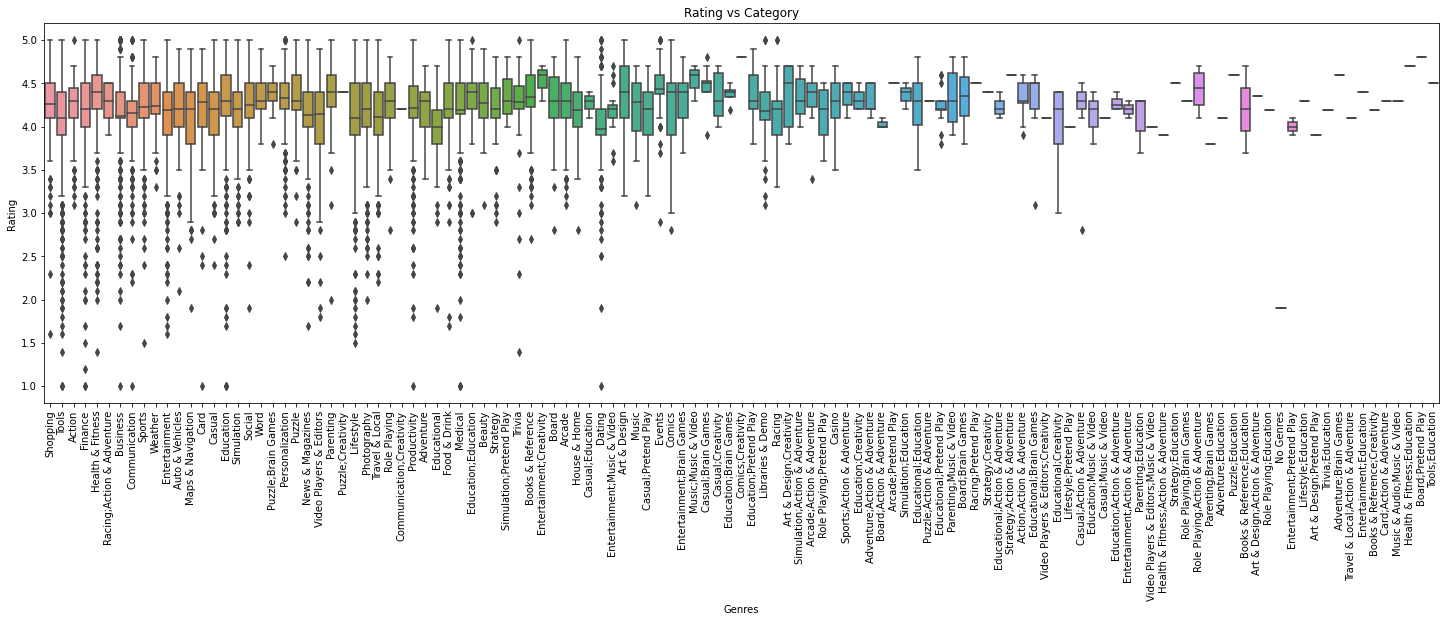

In [ ]:
#Plotting box plot for Rating vs Genres.
plt.figure(figsize=(25,7))
sns.boxplot(x = ps_df['Genres'], y = ps_df['Rating'], data = ps_df, orient = 'v')
plt.title("Rating vs Category")
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Checking the top 5 Genres with highest rating.
gen_rat_df = ps_df.groupby(['Genres'])['Rating'].median().reset_index(name = 'median')
gen_rat_df.sort_values(by ='median', ascending = False, inplace = True)
gen_rat_df.head()

,Genres,median
18,Board;Pretend Play,4.8
34,Comics;Creativity,4.8
63,Health & Fitness;Education,4.7
105,Strategy;Action & Adventure,4.6
73,Music;Music & Video,4.6


**The Top 5 Genres with highest ratings are - Board;Pretend Play, Comics;Creativity, Health & Fitness;Education, Strategy;Action & Adventure, Music;Music & Video.**

In [ ]:
#Checking 5 Genres with worst rating.
gen_rat_df.tail()

,Genres,median
37,Dating,3.970769
12,Art & Design;Pretend Play,3.900000
62,Health & Fitness;Action & Adventure,3.900000
77,Parenting;Brain Games,3.800000
75,No Genres,1.900000


**5 Genres with worst ratings are - Dating, Art & Design;Pretend Play, Health & Fitness; Action & Adventure, Parenting;Brain Games, No Genres.**

## **Graph 8 - Number of Apps vs Content Rating:**

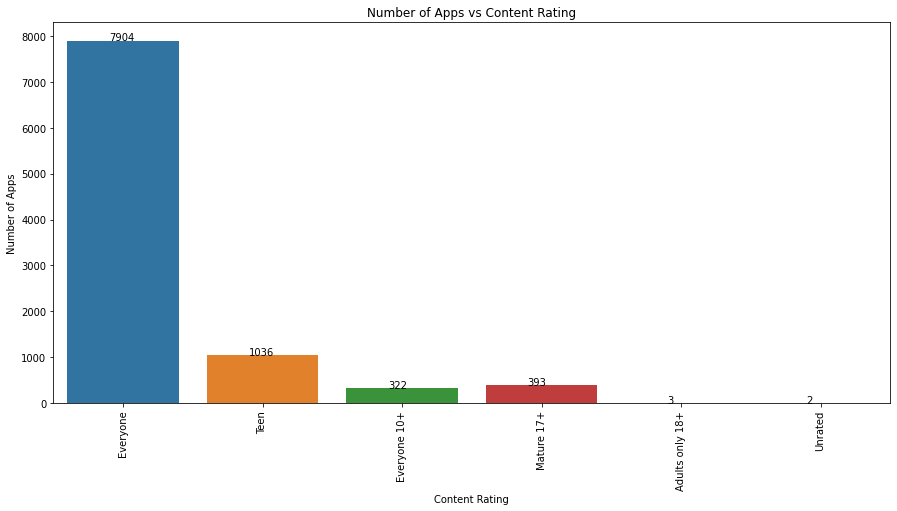

In [ ]:
#Plotting Number of Apps vs Content Rating.
plt.figure(figsize=(15,7))
plt.title("Number of Apps vs Content Rating")
ax = sns.countplot(x = 'Content Rating', data = ps_df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.5))
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.xticks(rotation = 90)
plt.show()

**Most of the apps in the play store are with content rating Everyone.**

## **Graph 9 - Pie Chart for Percentage of Apps in each Content Rating**

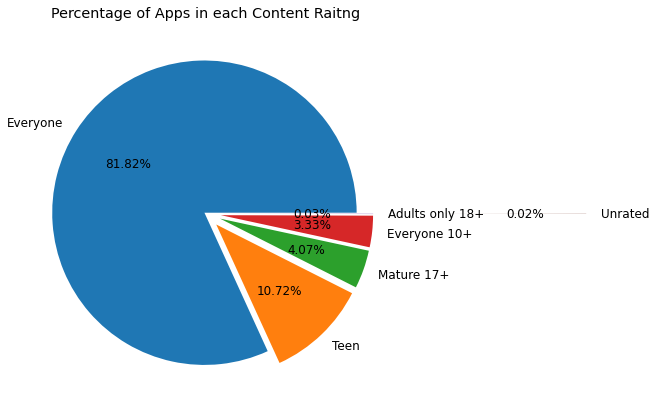

In [ ]:
#Plotting pie chart to show the percentage of apps in each content rating.
plt.rcParams['font.size'] = 12
plt.figure(figsize = (7,7))
exp = (0.01,0.1,0.1,0.1,0.1,1.5)
ps_df['Content Rating'].value_counts().plot.pie(autopct = '%1.2f%%', explode = exp)
plt.title('Percentage of Apps in each Content Raitng')
plt.axis('off')
plt.show()

## **Graph 10 - Number of Installs vs Content Rating:**



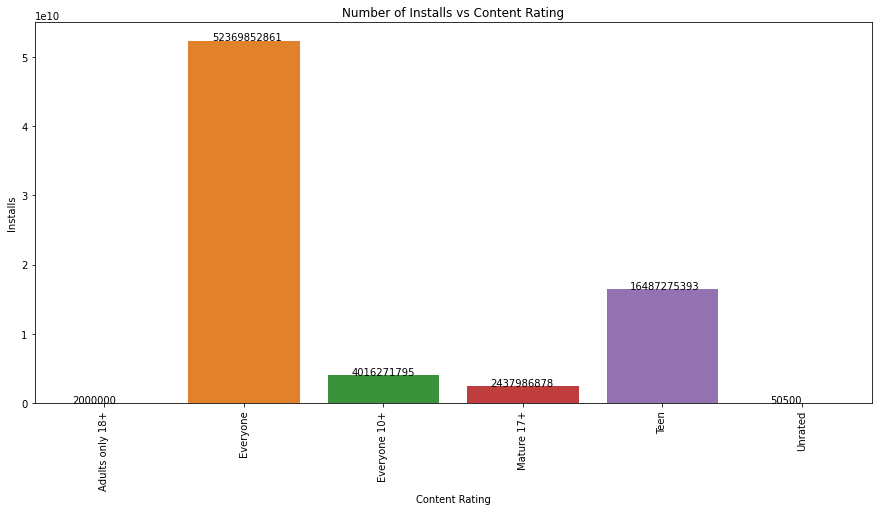

In [ ]:
#Plotting Number of Installs vs Content Rating.
plt.rcParams['font.size'] = 10                          #Setting the font size back to 10 as we have changed the font to 12 in the code above.
cont = ps_df.groupby('Content Rating')
cont_install_df = cont[['Installs']].sum()
cont_install_df = cont_install_df.reset_index()
plt.figure(figsize=(15,7))
plt.title("Number of Installs vs Content Rating")
ax = sns.barplot(x = 'Content Rating', y = 'Installs', data = cont_install_df)
for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x()+0.17, p.get_height()+0.5))
plt.xlabel("Content Rating")
plt.ylabel("Installs")
plt.xticks(rotation = 90)
plt.show()

**Since there is huge amount of apps with content rating Everyone in the play store comapred to other content ratings therefore the number of installs are also much higher for apps with content rating everyone.**

## **Graph 11 - Box plot to show Rating vs Content Rating**

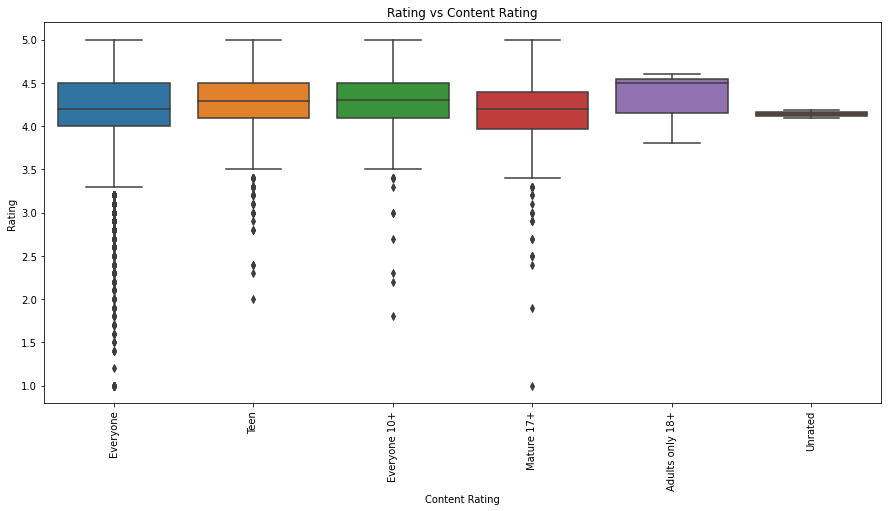

In [ ]:
#Plotting box plot for Rating vs Content Rating.
plt.figure(figsize=(15,7))
sns.boxplot(x = ps_df['Content Rating'], y = ps_df['Rating'], data = ps_df, orient = 'v')
plt.title("Rating vs Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Checking the median rating for each content rating.
con_rat_df = ps_df.groupby(['Content Rating'])['Rating'].median().reset_index(name = 'median')
con_rat_df.sort_values(by ='median', ascending = False, inplace = True)
con_rat_df

,Content Rating,median
0,Adults only 18+,4.500000
2,Everyone 10+,4.300000
4,Teen,4.286326
1,Everyone,4.200000
3,Mature 17+,4.200000
5,Unrated,4.146136


**Adults Only 18+ contents are having the highest ratings of 4.5 followed by Everyone 10+ with 4.3 then follows Teen with rating 4.2, Everyone with rating 4.2, Mature 17+ with rating 4.2 and Unrated with rating 4.1.**

## **Graph 12 - Pie Chart to find the percentage of Free apps and Paid apps.**

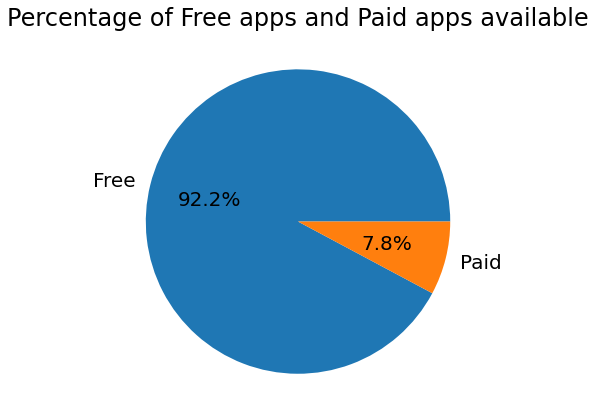

In [ ]:
#Plotting pie chart.
plt.rcParams['font.size'] = 20
plt.figure(figsize = (7,7))
ps_df['Type'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Percentage of Free apps and Paid apps available')
plt.axis('off')
plt.show()

## **Graph 13 - Bar Chart to show Number of Installs vs Category with Type of the app**

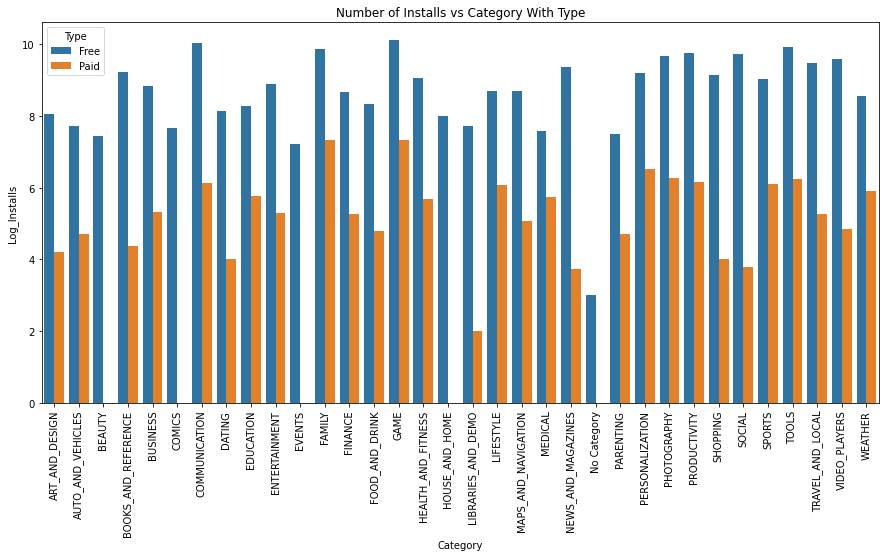

In [ ]:
#Plotting Number of Installs vs Category with Type, Converting the number of Installs to log10 for better visualization.
plt.rcParams['font.size'] = 10                   #Setting the font size back to 10 as we have changed the font to 20 in the code above.
cat_type_install_df = ps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
cat_type_install_df['Log_Installs'] = np.log10(cat_type_install_df['Installs'])
plt.figure(figsize=(15,7))
plt.title("Number of Installs vs Category With Type")
sns.barplot(x = 'Category', y = 'Log_Installs', hue = 'Type', data = cat_type_install_df)
plt.xlabel("Category")
plt.ylabel("Log_Installs")
plt.xticks(rotation = 90)
plt.show()

**From the above graph it is evident that users are installing more of the Free apps from play store as compared to the Paid apps.**

## **Graph 14 - Reviews vs Category**

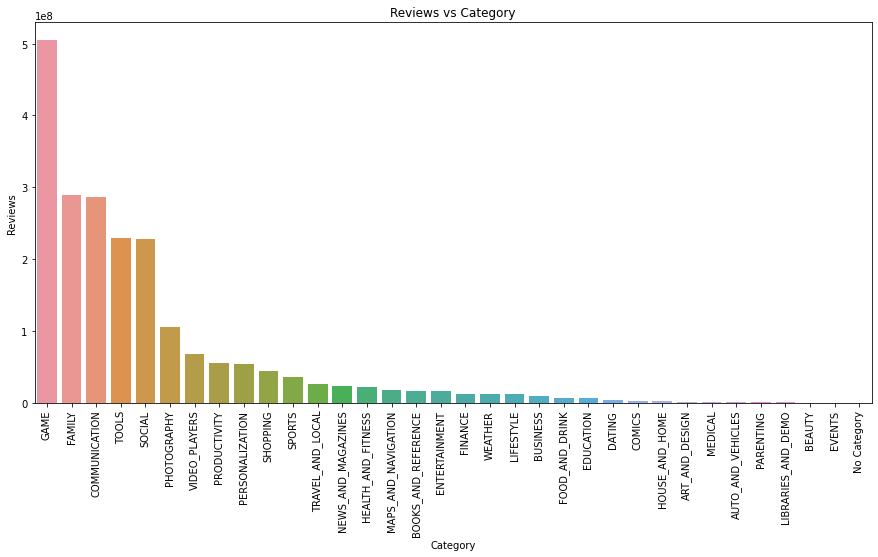

In [ ]:
#Plotting Number of Reviews vs Category.
cat_rev_df = ps_df.groupby(['Category'])[['Reviews']].sum().reset_index()
cat_rev_df.sort_values(by = 'Reviews', ascending = False, inplace = True)
plt.figure(figsize=(15,7))
plt.title("Reviews vs Category")
sns.barplot(x = 'Category', y = 'Reviews', data = cat_rev_df)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.xticks(rotation = 90)
plt.show()

**From the above graph we can make out that the top 5 categories having most number of reviews in the play store are - GAME, FAMILY, COMMUNICATION, TOOLS & SOCIAL.**

In [ ]:
# Extracting the number of reviews for the top 5 categories.
cat_rev_df.head()

,Category,Reviews
14,GAME,504462287
11,FAMILY,288729784
6,COMMUNICATION,285822658
30,TOOLS,229421128
28,SOCIAL,227849772


## **Graph 15 - Distribution of Size**

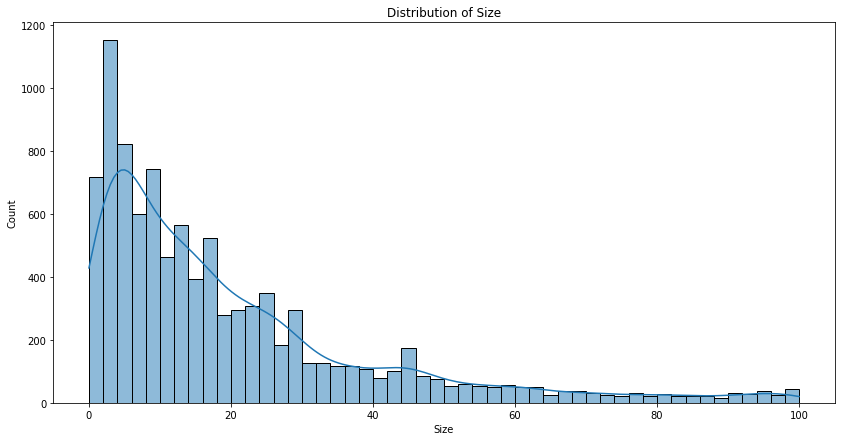

In [ ]:
#Plotting distribution of size.
plt.figure(figsize=(14,7))
plt.title("Distribution of Size")
sns.histplot(ps_df['Size'], kde = True)
plt.show()

**From the above graph we can infer that most of the apps are of smaller size.**

## **Graph 16 - Number of Apps vs Android Version**

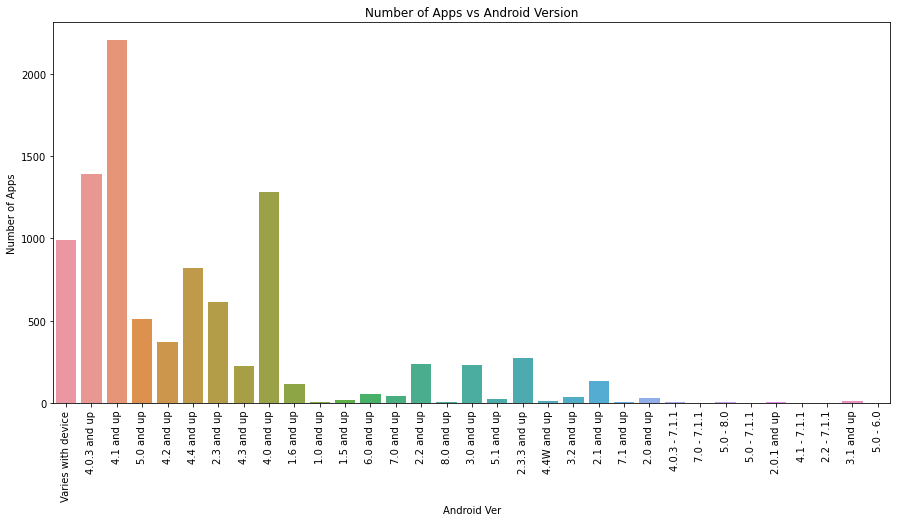

In [ ]:
#Plotting Number of Apps vs Android Version.
plt.figure(figsize=(15,7))
plt.title("Number of Apps vs Android Version")
sns.countplot(x = 'Android Ver', data = ps_df)
plt.xlabel("Android Ver")
plt.ylabel("Number of Apps")
plt.xticks(rotation = 90)
plt.show()

**From the above graph we can infer that most of the apps are running at Android Version 4.1 and above.**

In [ ]:
#Correlation matrix for Play Store data set.
ps_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.054602,0.057183,0.039693,-0.019478
Reviews,0.054602,1.000000,0.077479,0.625082,-0.007589
Size,0.057183,0.077479,1.000000,0.043539,-0.021756
Installs,0.039693,0.625082,0.043539,1.000000,-0.009409
Price,-0.019478,-0.007589,-0.021756,-0.009409,1.000000


## **Graph 17 - Correlation heat map for the play store dataset.**

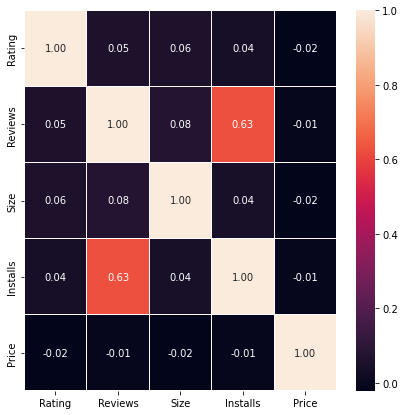

In [ ]:
#Plotting correlation heat map for the play store dataset.
plt.figure(figsize = (7,7))
sns.heatmap(ps_df.corr(), annot = True, linewidths = 0.1, fmt = '0.2f')
plt.show()

## **Now merging the User Review dataset with the Play Store dataset.**

In [ ]:
#Merging the User Review dataset with Play Store dataset in a new dataframe with name final_ps_df.
final_ps_df = ps_df.merge(ur_df, on = 'App')
final_ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Fun Kid Racing - Motocross,FAMILY,4.1,59768,28.319251,10000000,Free,0.0,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2 and up,Why like exist playstore?! Does Google even re...,Negative,-0.500,0.400000
1,Fun Kid Racing - Motocross,FAMILY,4.1,59768,28.319251,10000000,Free,0.0,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2 and up,We loved game especially little brother . Thumbs,Negative,-0.025,0.733333
2,Fun Kid Racing - Motocross,FAMILY,4.1,59768,28.319251,10000000,Free,0.0,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2 and up,£104 unlock content?! Bloody trap!!! Absolutel...,Negative,-1.000,0.950000
3,Fun Kid Racing - Motocross,FAMILY,4.1,59768,28.319251,10000000,Free,0.0,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2 and up,Too many ads. Kids lose interest second add,Positive,0.250,0.250000
4,Fun Kid Racing - Motocross,FAMILY,4.1,59768,28.319251,10000000,Free,0.0,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2 and up,This game fantastic good game,Positive,0.075,0.575000


**There are three main columns in the User Review dataset - Sentiment, Sentiment_Polarity and Sentiment_Subjectivity.**
  * Sentiment is the view or opinion of the user about the app. So, the view/opinion may be Positive, Negative or Neutral.
  * Sentiment_Polarity column contains values from -1 to 1. Where -1 is the most negative polarity and 1 is the most positive polarity. This column can also contain 0 which means neutral polarity.
  * Sentiment_Subjectivity contains values ranging from 0 to 1. Where 0 being the very much objective sentence and 1 is very much subjective. Subjectivity refers to the degree to which a person is personally involved in an object.

## **Graph 18 - Pie Chart for Sentiment**

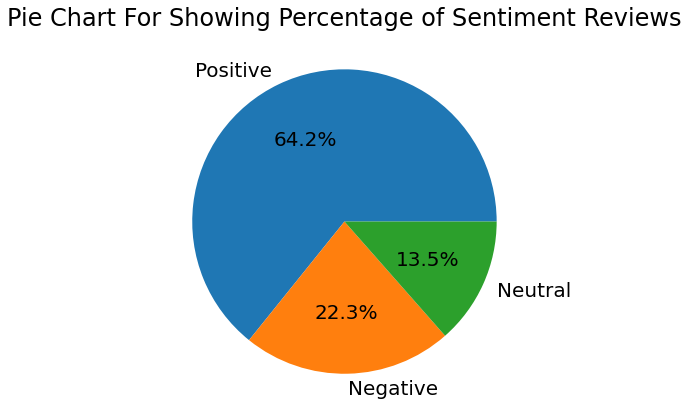

In [ ]:
#Plotting pie chart for Sentiment.
plt.rcParams['font.size'] = 20
plt.figure(figsize = (7,7))
final_ps_df['Sentiment'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Pie Chart For Showing Percentage of Sentiment Reviews')
plt.axis('off')
plt.show()

**The above graph shows that there are 64.2% positive reviews, 13.5% Neutral reviews and 22.3% Negative reviews.**

## **Graph 19 - Distribution of Sentiment Polarity**

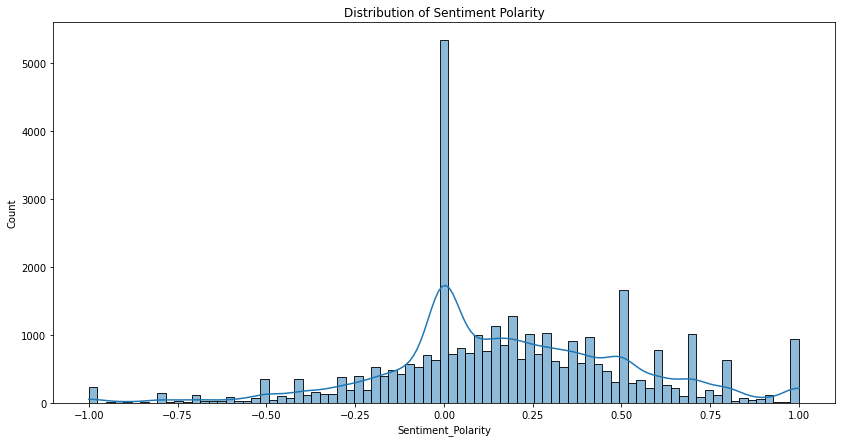

In [ ]:
#Plotting distribution of Sentiment Polarity.
plt.rcParams['font.size'] = 10               #Setting the font size back to 10 as we have changed the font to 20 in the code above.
plt.figure(figsize=(14,7))
plt.title("Distribution of Sentiment Polarity")
sns.histplot(final_ps_df['Sentiment_Polarity'], kde = True)
plt.show()

**The above graph shows that the width of the distribution is more towards the left of the graph which makes it left skewed. So, the Polarity of most of the users is towards the positive side as we already saw in the pie chart. Also, most of the reviews are having 0 polarity.**

## **Graph 20 - Histogram plot of Sentiment Subjectivity**

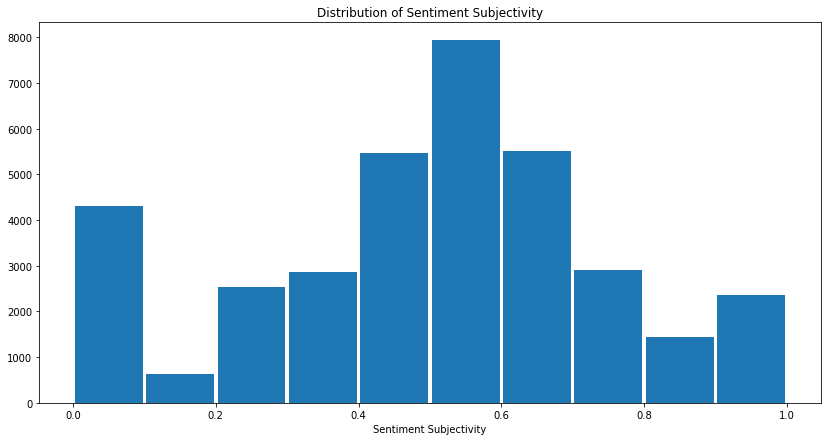

In [ ]:
#Plotting distribution of Sentiment Polarity.
plt.figure(figsize=(14,7))
plt.title("Distribution of Sentiment Subjectivity")
plt.hist(final_ps_df['Sentiment_Subjectivity'], rwidth = 0.95)
plt.xlabel("Sentiment Subjectivity")
plt.show()

**From the above histogram plot we can infer that most the sentiment subjectivity lies between 0.4 to 0.7 which shows that most of the reviews are towards subjective point of view of the users.**

In [ ]:
cat_sent_df = final_ps_df.groupby(['Category', 'Sentiment']).size().reset_index().pivot(columns = 'Sentiment', index = 'Category', values = 0)
cat_sent_df.head()

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,61,62,259
AUTO_AND_VEHICLES,17,36,236
BEAUTY,65,88,185
BOOKS_AND_REFERENCE,95,108,448
BUSINESS,167,258,654


## **Graph 21 - Number of Apps vs Category with Reviews Sentiment Stacking**

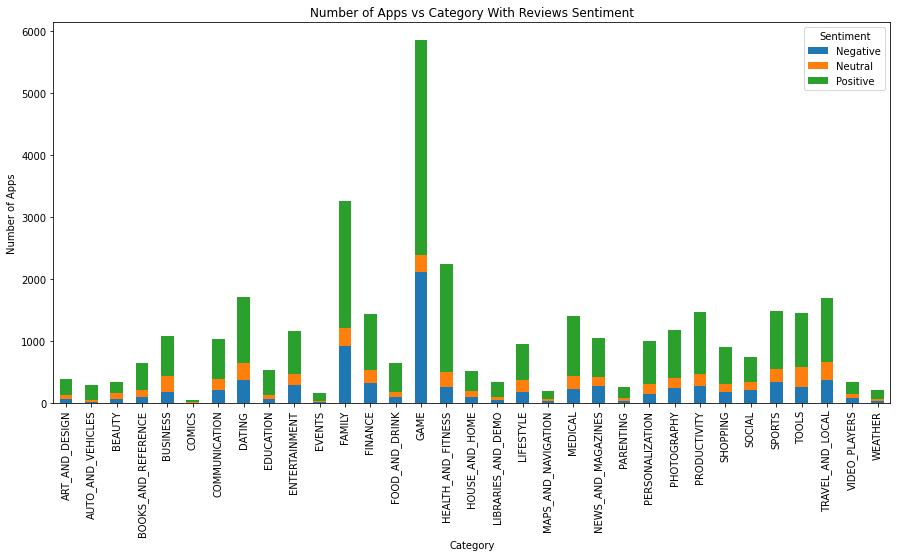

In [ ]:
#Plotting Number of Apps vs Category with Reviews Sentiment Stacking.
cat_sent_df.plot(kind = 'bar', stacked = True, figsize=(15,7))
plt.title("Number of Apps vs Category With Reviews Sentiment")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

In [ ]:
#Top 5 Categories most positive reviews -
pos_rev_app_df = cat_sent_df.sort_values(by ='Positive', ascending = False).drop(['Negative','Neutral'], axis = 1)
pos_rev_app_df.head()

Sentiment,Positive
Category,
GAME,3461
FAMILY,2041
HEALTH_AND_FITNESS,1754
DATING,1068
TRAVEL_AND_LOCAL,1034


**The Top 5 Categories with most positive reviews are - GAME, FAMILY, HEALTH_AND_FITNESS, DATING, TRAVEL_AND_LOCAL.**

In [ ]:
#Worst 5 Categories with most negative reviews -
neg_rev_app_df = cat_sent_df.sort_values(by ='Negative', ascending = False).drop(['Positive','Neutral'], axis = 1)
neg_rev_app_df.head()

Sentiment,Negative
Category,
GAME,2109
FAMILY,914
TRAVEL_AND_LOCAL,367
DATING,361
SPORTS,337


**5 Categories with most negative reviews are - GAME, FAMILY, TRAVEL_AND_LOCAL, DATING & SPORTS. GAME and FAMILY are common in the above two list, both these categories are having positive reviews as well as negative reviews.**

## **Graph 22 - Correlation heat map for the final play store dataset.**

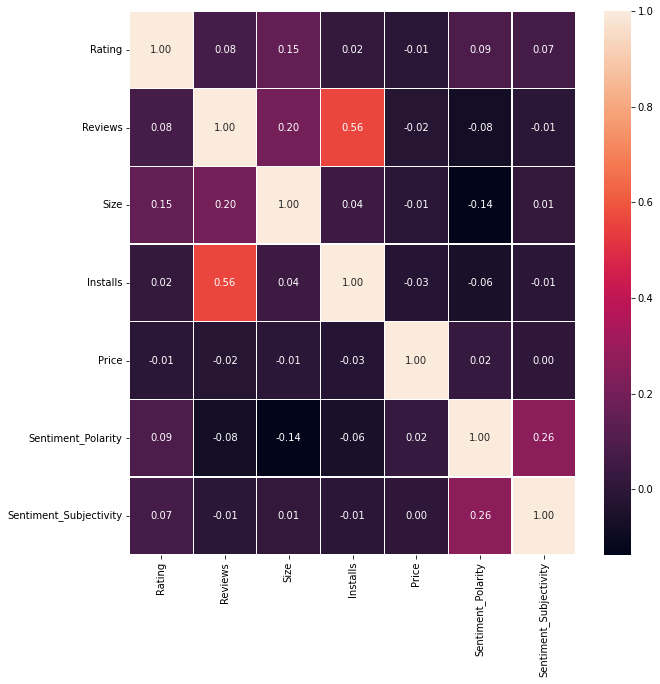

In [ ]:
#Plotting correlation heat map for the final play store dataset.
plt.figure(figsize = (10,10))
sns.heatmap(final_ps_df.corr(), annot = True, linewidths = 0.1, fmt = '0.2f')
plt.show()

## **Some more insights to the dataset.**

**5 apps which are most costly in the play store -**

In [ ]:
#Checking the top 5 most costly apps.
cost_app_df = ps_df.sort_values(by ='Price', ascending = False)
cost_app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.600000,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5369,I am Rich,FINANCE,4.300000,180,3.800,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.094904,0,40.000,0,Paid,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1 and up
5359,I am rich(premium),FINANCE,3.500000,472,0.965,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up
5351,I am rich,LIFESTYLE,3.800000,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up


**5 most reviewed apps in the playstore -**

In [ ]:
#Checking the top 5 most reviewed apps.
most_rev_app_df = ps_df.sort_values(by ='Reviews', ascending = False)
most_rev_app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,17.681871,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,11.766706,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,17.681871,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,11.766706,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
3986,Clash of Clans,FAMILY,4.6,44881447,98.000000,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up


**Apps with rating 5.0 -**

In [ ]:
#Checking apps with rating 5.0
ps_df[ps_df['Rating'] == 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104,2.300,1000,Free,0.00,Everyone,Finance,2018-08-07,2.1.0,4.1 and up
9089,DYPSOET,FAMILY,5.0,8,7.400,50,Free,0.00,Everyone,Education,2018-08-07,1.0.2,4.1 and up
7698,CP Trivia,GAME,5.0,5,12.000,100,Free,0.00,Everyone,Trivia,2018-08-06,0.99,5.0 and up
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2,14.000,1000,Free,0.00,Teen,Business,2018-08-05,1.1,4.2 and up
7147,CB Heroes,SOCIAL,5.0,5,1.800,5,Free,0.00,Everyone,Social,2018-08-04,1.2.4,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40.000,10,Paid,19.99,Everyone,Education,2014-05-26,2.47,2.2 and up
7100,CA Speakers,LIFESTYLE,5.0,12,1.200,100,Paid,0.99,Teen,Lifestyle,2014-03-25,1.0,3.0 and up
8601,DN Calculators,FINANCE,5.0,12,0.775,100,Free,0.00,Everyone,Finance,2013-09-05,1.11,3.0 and up
5482,meStudying: AP English Lit,FAMILY,5.0,1,0.655,10,Paid,4.99,Everyone,Education,2013-08-31,1.3,2.0.1 and up


**There are 271 apps in the play store with 5 rating.**

**Apps with worst rating -**

In [ ]:
#Checking apps with worst rating.
ps_df[ps_df['Rating'] == 1.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
625,House party - live chat,DATING,1.0,1,9.2,10,Free,0.00,Mature 17+,Dating,2018-07-31,3.52,4.0.3 and up
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,21.0,1000,Free,0.00,Everyone,Education,2018-07-27,5.33.3669,5.0 and up
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2,33.0,100,Free,0.00,Everyone,Medical,2018-07-02,2.0.1,4.1 and up
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9,1000,Free,0.00,Everyone,Card,2018-05-21,6.2-sayc,4.0 and up
8875,DT future1 cam,TOOLS,1.0,1,24.0,50,Free,0.00,Everyone,Tools,2018-03-27,3.1,2.2 and up
8820,DS Creator 2.0,TOOLS,1.0,2,4.4,500,Free,0.00,Everyone,Tools,2018-03-23,2.0.180226.1,4.0 and up
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6.6,100,Free,0.00,Everyone,Productivity,2018-03-15,41.9,4.1 and up
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41.0,500,Free,0.00,Everyone,Tools,2017-12-12,1.0,4.2 and up
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13.0,100,Free,0.00,Everyone,Communication,2017-10-06,1.0,4.1 and up
7926,Tech CU Card Manager,FINANCE,1.0,2,7.2,1000,Free,0.00,Everyone,Finance,2017-07-25,1.0.1,4.0 and up


**There are 16 apps with worst rating of 1.0 in the play store.**

**5 most installed apps from the playstore -**

In [ ]:
#Checking the top 5 most installed apps.
most_ins_app_df = ps_df.sort_values(by ='Installs', ascending = False)
most_ins_app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,17.367665,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,16.084580,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,11.766706,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,24.654495,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,13.310822,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device


**Top 5 Apps with most positive reviews.**

In [ ]:
# checking the top 5 apps with most positive reviews.
pos_rev = ur_df[ur_df['Sentiment'] == 'Positive']
pos_rev_ar = pos_rev.groupby(['App'])[['Sentiment']].count().reset_index()
pos_rev_ar.sort_values(by = 'Sentiment', ascending = False, inplace = True)
pos_rev_ar.head()

,App,Sentiment
805,Helix Jump,209
502,Duolingo: Learn Languages Free,200
324,Calorie Counter - Macros,174
325,Calorie Counter - MyFitnessPal,169
256,Bowmasters,169


**5 Apps with most negative reviews.**

In [ ]:
# 5 apps with most negative reviews.
neg_rev = ur_df[ur_df['Sentiment'] == 'Negative']
neg_rev_ar = neg_rev.groupby(['App'])[['Sentiment']].count().reset_index()
neg_rev_ar.sort_values(by = 'Sentiment', ascending = False, inplace = True)
neg_rev_ar.head()

,App,Sentiment
103,Angry Birds Classic,147
298,Candy Crush Saga,126
236,Bowmasters,119
19,8 Ball Pool,106
299,Candy Crush Soda Saga,96


# **Conslusion**

In this EDA the given datasets are analysed and several graphs has been plotted which can be used to give more insights to the dataset.

Family category has the greatest number of apps present in the play store. Game category is the most installed and reviewed from the play store although the number of apps in Game category is almost half of the number of apps in Family category. This shows that the categories which are more entertaining will do better instead of having lower number of apps present. Events category has the maximum ratings of around 4.44.

The most installed apps are from Communication Genres.

Most of the apps present in the play store are available for everyone, there are very few apps which are having age restrictions. Also, we can see the Content Rating Teen is having a quite good number of installs which shows that the present youths are quite good at operating apps and thus developers can develop more apps which suits to the interest of the teens.

There are more free apps present in the play store than the paid apps and also, quite evident users prefer to install free apps more as compared to the paid apps this gives direction that the developers can launch more of the free apps and for earning money, they can use other means such as through advertisements in the apps or monetizing certain section of the app which serves certain special purpose or any other means.

Game category has a greater number of positive reviews as well as negative reviews since there is more installs from the Game category.

From the correlation matrix we can infer that reviews and installs are having a good correlation which is quite evident as the more the number of installs more will be the number of reviews. Also, Sentiment Polarity and Sentiment Subjectivity are somewhat correlated.